<a href="https://colab.research.google.com/github/praddhumnasoni/ARAI-Assingment/blob/main/ARAI_Assignment_Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries
from keras.datasets import mnist
import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#loading Dataset  
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
#(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

In [ ]:
#Displaying some set of Images in Binary form
def showImg(i):
  plt.imshow(x_train[i], cmap = 'binary')
  plt.title(y_train[i])
  plt.show()

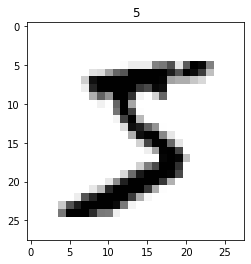

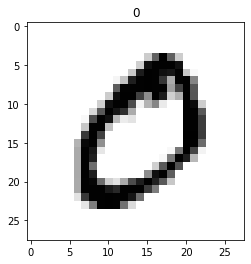

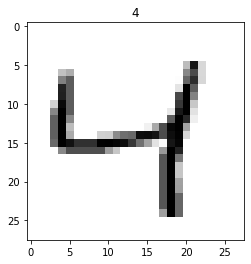

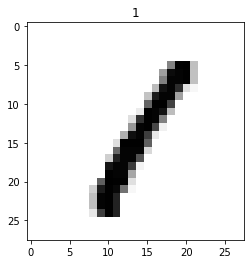

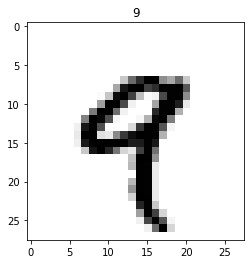

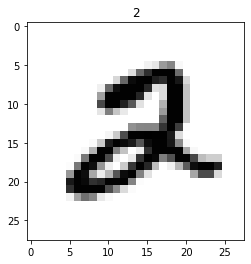

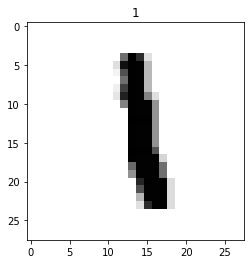

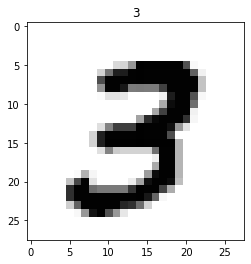

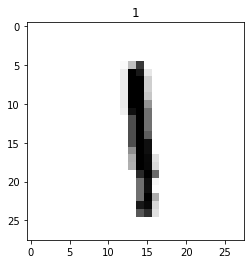

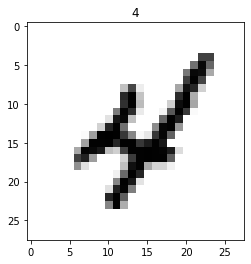

In [ ]:
for i in range(0,10):
  showImg(i)

In [ ]:
#scaling Dataset
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255


In [ ]:
#Expanding the range
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test[0].shape

(28, 28, 1)

In [ ]:
#Creating labels suitable to model
def setValue(y_train):
  size = len(y_train)
  temp = np.array([[0,0,0,0,0,0,0,0,0,0]]*size)
  for i in range(0,size):
    temp[i,y_train[i]] = 1
  return(temp)

In [ ]:
y_train = setValue(y_train)
y_test = setValue(y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [ ]:
#Defining Model Paramters
model = Sequential()

model.add(Conv2D(32, (3,3),input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_3 (Dropout)         (None, 1600)             

In [ ]:
model.compile(optimizer='adam', loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_acc', min_delta=0.01, patience=4, verbose=1)

mc = ModelCheckpoint("./bestmodel.h5", monitor="val_acc", verbose=1, save_best_only= True)
cb = [es,mc]

In [ ]:
#Training Model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.3, callbacks=cb)

Epoch 1/5
1312/1313 [============================>.] - ETA: 0s - loss: 0.2541 - accuracy: 0.9216WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


1313/1313 [==============================] - 44s 33ms/step - loss: 0.2540 - accuracy: 0.9217 - val_loss: 0.0813 - val_accuracy: 0.9759
Epoch 2/5
1312/1313 [============================>.] - ETA: 0s - loss: 0.0932 - accuracy: 0.9718WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


1313/1313 [==============================] - 45s 34ms/step - loss: 0.0931 - accuracy: 0.9718 - val_loss: 0.0637 - val_accuracy: 0.9798
Epoch 3/5
1311/1313 [============================>.] - ETA: 0s - loss: 0.0722 - accuracy: 0.9776WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


1313/1313 [==============================] - 44s 33ms/step - loss: 0.0721 - accuracy: 0.9776 - val_loss: 0.0507 - val_accuracy: 0.9845
Epoch 4/5
1311/1313 [============================>.] - ETA: 0s - loss: 0.0598 - accuracy: 0.9813WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


1313/1313 [==============================] - 47s 36ms/step - loss: 0.0598 - accuracy: 0.9813 - val_loss: 0.0427 - val_accuracy: 0.9872
Epoch 5/5
1311/1313 [============================>.] - ETA: 0s - loss: 0.0529 - accuracy: 0.9831WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


1313/1313 [==============================] - 45s 34ms/step - loss: 0.0529 - accuracy: 0.9831 - val_loss: 0.0424 - val_accuracy: 0.9863


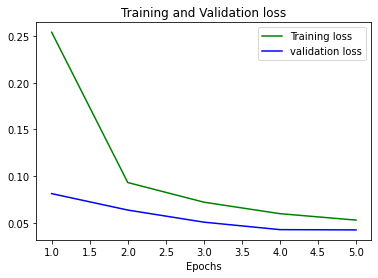

In [ ]:
#Plotting Graph
loss_train = history.history['loss']
loss_val = history.history['val_loss']
accu = history.history['accuracy']
accu_val = history.history['val_accuracy']
epochs = range(1,6)

plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

Text(0.5, 0, 'Epochs')

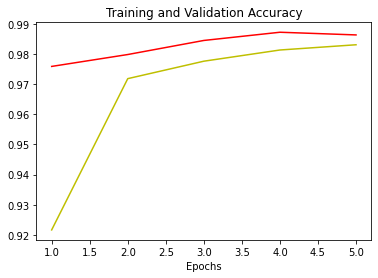

In [ ]:
plt.plot(epochs, accu, 'y', label='accuracy')
plt.plot(epochs, accu_val, 'r', label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [ ]:
#Saving the Model
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

INFO:tensorflow:Assets written to: ram://a88dfab6-9ae3-4906-bd9a-10a62e29eff4/assets


INFO:tensorflow:Assets written to: ram://a88dfab6-9ae3-4906-bd9a-10a62e29eff4/assets


In [ ]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 7s 21ms/step - loss: 0.0316 - accuracy: 0.9902


In [ ]:
y_pred = model.predict(x_test)
y_pred[0]


array([5.9412858e-10, 1.0132828e-10, 3.8881072e-07, 6.7580351e-07,
       7.8414228e-13, 2.1789326e-11, 9.9510734e-17, 9.9999774e-01,
       6.5977148e-09, 1.1382394e-06], dtype=float32)

(28, 28)


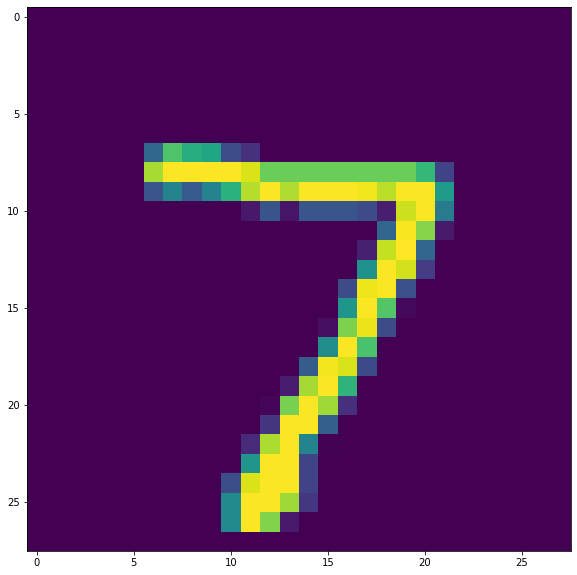

In [ ]:
np.argmax(y_pred[0])
copy = x_test[0].copy()
plt.figure(figsize=(12,10))
copy = copy.reshape(28,28)
print(copy.shape)
plt.imshow(copy)

In [ ]:
ypred = [np.argmax(i) for i in y_pred]


In [ ]:
#Generating Confusion Metrics
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(ytest,ypred)
confusion_matrix

array([[ 978,    0,    0,    0,    0,    0,    0,    1,    1,    0],
       [   0, 1130,    3,    1,    0,    0,    1,    0,    0,    0],
       [   0,    1, 1013,    3,    1,    0,    1,   11,    2,    0],
       [   0,    0,    1, 1004,    0,    1,    0,    3,    1,    0],
       [   0,    0,    0,    0,  972,    0,    1,    0,    2,    7],
       [   1,    0,    0,    5,    0,  882,    1,    1,    1,    1],
       [   3,    2,    0,    0,    1,    6,  945,    0,    1,    0],
       [   0,    2,    1,    1,    0,    0,    0, 1023,    1,    0],
       [   3,    0,    2,    1,    0,    0,    1,    1,  962,    4],
       [   3,    2,    0,    1,    2,    3,    0,    4,    1,  993]])

Text(69.0, 0.5, 'Truth')

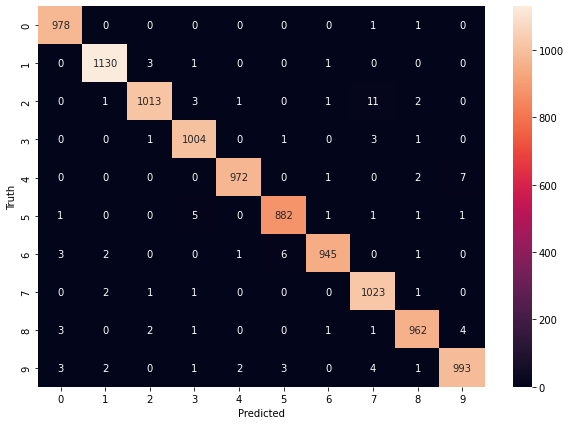

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(confusion_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')